[![esg_image](https://www.jpmorgan.com/content/dam/jpm/commercial-banking/insights/leadership/esg%20-article-graphic.jpg)](https://www.jpmorgan.com/content/dam/jpm/commercial-banking/insights/leadership/esg%20-article-graphic.jpg)

___

# ESG Reddit Scraper

### What is ESG?
Environmental, Social, and Corporate Governance (ESG) refers to the three criteria in measuring the sustainability and societal impact of an investment in a company or business. This project scrapes Reddit submissions based on certain keywords (can be found in the initial script **reddit_scraper.py**) and their first level comments. 

Environmental, social, and governance standards have often been overlooked when it comes to investing. Lately, however, these standards have become more prominent within the new generation of investors. Just recently, Goldman Sachs announced that they will no longer take companies public if they had an all-male board members. This could be contributed to the social and governance aspect of ESG. 

Cool report by [JP Morgan](https://www.jpmorgan.com/commercial-banking/insights/esg-and-its-value-to-stakeholders) about the benefits of ESG driven companies and its value for shareholders.

### Reddit Scraper
The goal of this scraper is to get an idea of how ESG topics and keywords are trending over Reddit. Reddit is famously known as the "front page of the internet". The submissions will be used to assess the trend of the keywords over time and their upvote ratio distribution. The comments will undergo a sentiment analyzer to get a sense of what the first-level response is to these submissions.

___

## Modules & Paths

In [1]:
import pandas as pd, numpy as np, seaborn as sns, datetime, nltk, re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib import pyplot as plt
import matplotlib as mpl

# optimizations
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


# paths
SUB_DF = '../dataframe_main/submission_main.csv'
COM_DF = '../dataframe_main/comment_main.csv'

___

# Exploratory Analysis

The scrape have already been done beforehand. The data frames used can be found [here](https://github.com/amirhallak/ESG_Report/tree/main/dataframe_main) and they are the concatenated data frames of the scraped keywords (individual data frames and their information can be found under [dataframes](https://github.com/amirhallak/ESG_Report/tree/main/dataframes)).

First, we start by importing the submission data frame. 

## 1. Import the Reddit submissions data frame

In [2]:
# import the csv file
columns = [
    'submission_id', 'title', 'author', 'num_comments', 
    'upvotes','upvote_ratio', 'date', 'subreddit', 'keyword'
    ]
df = pd.read_csv(SUB_DF, usecols=columns, dtype=str, encoding='utf-8')

# check the first rows for an idea of what the scrape includes
df.head(5)

,submission_id,title,author,num_comments,upvotes,upvote_ratio,date,subreddit,keyword
0,jk3y7q,Recent graduate trying to find career in ESG,bestimperfection,3,5,0.78,29-10-2020,FinancialCareers,esg
1,jc04cz,Does my school matter when considering ESG inv...,Jtpav03,3,0,0.5,16-10-2020,FinancialCareers,esg
2,jj18rl,I have interview for ESG Equity Research buy side,24Gameplay_,1,0,0.5,27-10-2020,FinancialCareers,esg
3,ival7l,Energy to ESG Analyst?,Human_panda279,4,4,0.75,18-09-2020,FinancialCareers,esg
4,ilsxih,How good is career in ESG Research?,godonlyknowsme,0,0,0.5,03-09-2020,FinancialCareers,esg


The submission data frame includes 5775 rows of ESG related submissions scraped from certain subreddits.
___


## 2. Starting with trend over time on Reddit

It is interesting to look at the ESG related submissions over time and their count. 

In [3]:
# creating a year variable for the year the submission was submitted 
df['year'] = df['date'].astype('datetime64').dt.year

# grouping by year and keyword to get the unique submission_id for each year and keyword
df1 = df.groupby(['year','keyword'])['submission_id'].nunique().reset_index()
df1.head(5)

,year,keyword,submission_id
0,2007,greenwashing,3
1,2008,ethical investing,1
2,2008,greenwashing,8
3,2008,impact investing,1
4,2008,responsible investing,4


The **submission_id** column is the number of unique submissions for that keyword in that year. 

The unique keywords that were scraped over certain subreddits are shown below:

In [4]:
# unique keywords
print(df1['keyword'].unique())

['greenwashing' 'ethical investing' 'impact investing'
 'responsible investing' 'sustainable investing' 'esg']


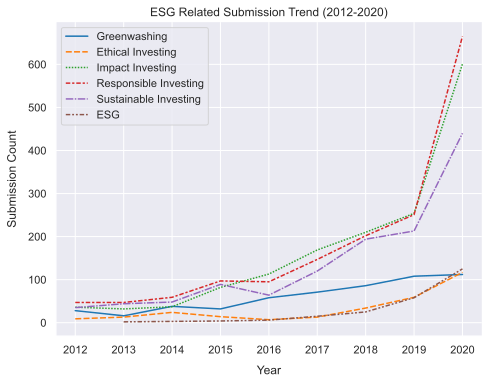

In [5]:
# graphing the first trend using matplotlib and seaborn
sns.set_style('darkgrid')
sns.set_context('notebook')

# first graph
g = sns.relplot(
    x='year',
    y='submission_id',
    data=df1.query("year > 2011"),
    kind='line',
    hue='keyword',
    style='keyword')
g._legend.remove()
g.set_axis_labels("Year", "Submission Count", labelpad=10)
g.fig.set_size_inches(10,5)
plt.title("ESG Related Submission Trend (2012-2020)")
plt.legend(
    ['Greenwashing','Ethical Investing','Impact Investing',
    'Responsible Investing', 'Sustainable Investing', 'ESG'], 
    frameon=True)

# show
plt.show()


The first graph shows a significant increase in ESG related topics posted by users on Reddit. The trend seems to significantly increase in the last 5 years. 
___

## 3. Looking at the upvote ratio when these topics are posted online

The upvote ratio is basically the number of upvotes divided by the number of down votes. The reason this is important is that it gives insight into the behavior of the users when faced with ESG related topics. 

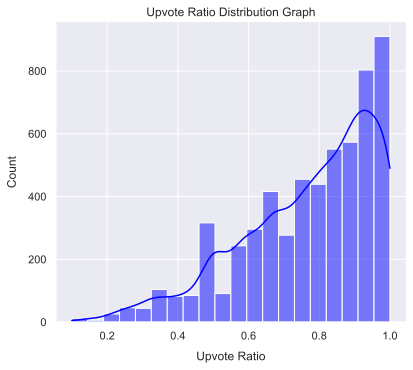

In [6]:
# plotting the ditribution of upvotes
g1 = sns.displot(df['upvote_ratio'].astype(float), bins=20, kde=True, color='b')
g1.fig.set_size_inches(6,5)
g1.set_axis_labels("Upvote Ratio", "Count", labelpad=10)
plt.title("Upvote Ratio Distribution Graph")

# show
plt.show()

The graph shows that the distribution is heavily left-skewed towards higher upvote ratios. This is an indicator that the majority of users are reacting positively to any ESG related news. 

It is important to note that the 1.0 upvote ratio is dominating due to the fact that many submissions automatically receive an upvote when posted. If the post was not popular, the upvote remains indefinitely. Therefore, it could be deduced that a majority of these posts did not attract attention or interactions.

___

## 4. Most Active Subreddits Regarding ESG Posts

To get an idea which subreddits were the most active regarding ESG trends. 

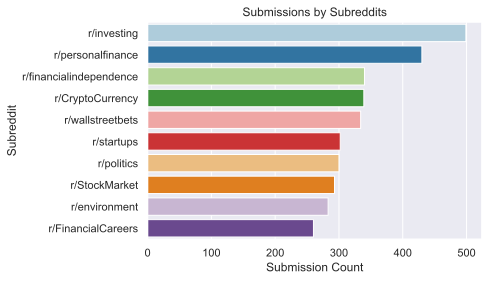

In [7]:
# grouping by to get the unique number of submissions per year, keyword, and subreddit
df_2 = df.groupby(['year','keyword','subreddit'])['submission_id'].nunique().reset_index()

# grouping by to get the sum of unique submissions per subreddit
df_2 = df_2.groupby(['subreddit'])['submission_id'].sum().reset_index()

# sorting by top subreddits -- preparations for grpahing
df_2 = df_2.sort_values(by='submission_id', ascending=False)
df_2['subreddit'] = 'r/' + df_2['subreddit'].astype(str)

# graphing
g2 = sns.barplot(y=df_2['subreddit'][:10],x=df_2['submission_id'][:10],palette="Paired")
g2.set(xlabel='Submission Count', ylabel='Subreddit')
g2.set_title("Submissions by Subreddits")

# show
plt.show()

The graph above shows that ESG topics are posted mostly in investment-related subreddits. 

This is somewhat expected given that ESG criteria of the target company are often checked before investing. The reason these criteria are looked at is to mitigate long-term risk of losses due to ESG related lawsuits and pitfalls. 

___

## 5. Submission Sentiment Analytics

Sentiment analytics are used to assess whether the string posted has a negative or positive sentiment.

In [8]:
# drop duplicate titles -- they were kept to see which subreddits were active
# fixing the strings and removing new lines and punctuation
df = df.drop_duplicates(subset=['title'])
df['title'] = df['title'].replace(r'\n',' ', regex=True)
df['title'] = df['title'].str.replace('[^\w\s]','', regex=True)

#define analyzer.
senti = SentimentIntensityAnalyzer()

# sentiment functions
def get_sentiment_score(comment):
    '''
    This function will assess each string it is applied on and returns
    a sentiment score based on the analyzer. 
    
    Params:
    comment:str
        The string value in the pandas cell.
        
    Returns:
    comment_score:float
        The score each string was assigned.
    '''
    
    comment_score = senti.polarity_scores(comment)['compound']
    return comment_score

# transalte the score to a positive, negative, or neutral string
def get_sentiment(score):
    '''
    This is a simple function that will return a string equivalant of the
    score given. It can be calibrated as needed.
    
    Params:
    score:float
        The score given by the sentiment analyzer.
    
    Returns:
        String equivalant of the score.
    '''
    
    if score > 0.1:
        return('Positive')
    if score < -0.1:
        return('Negative')
    else:
        return('Neutral')

# apply the functions on the submission titles in the data frame
df['sentiment_score'] = df['title'].astype(str).apply(get_sentiment_score)
df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

Now that the scores have been assigned to each submission title, it is important to note that titles won't have as much information as the comments in the sections below. The majority were assigned a "neutral" or 0 value. 
___
**Top 5 positive sentiment titles are shown below:**

In [9]:
# pandas cell viewer optimizations
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', None)

# show top positive submissions
df[['title','sentiment_score','sentiment']].sort_values('sentiment_score',ascending=False).head(5)

,title,sentiment_score,sentiment
4530,The Myth of Asias Miracle by Paul Krugman Asian growth like that of the Soviet Union in its highgrowth era seems to be driven by extraordinary growth in inputs like labor and capital rather than by gains in efficiency,0.9509,Positive
1130,I am new to investing but have been following this subreddit for awhile now I learned that portfolio diversification is a fiscally responsible route to take to ensure safe returns Does that mean buying Snap Puts with different exp dates and strike prices Thanks for the help,0.9505,Positive
805,It is time to recognise the benefits of social housing You could live in a home with a stable tenancy that is clean safe and cheap has mechanisms for accountability and ethical practices can save taxpayers money and can even invest in your community,0.9423,Positive
5622,6 African Countries Win 330 Million to Spur Private Investment in Climate Solutions Projects to help boost private investment in renewable energy energy efficiency sustainable forests get funding,0.9393,Positive
5417,How would you spend your time You own two startups Startup 1 is less than six months old with huge growth potential and getting good early traction but needs cash to run Startup 2 is already doing great and has a clear path for growth but the upside is much lower with more competition,0.9331,Positive


**Top 5 negative sentiments are shown below:**

In [10]:
# show top negative submissions
df[['title','sentiment_score','sentiment']].sort_values('sentiment_score',ascending=True).head(5)

,title,sentiment_score,sentiment
949,BANKER Im Mad As Hell About Being Blamed For The Economic Crisis And Im Not Going To Take It Anymore,-0.9432,Negative
1738,JAMIE DIMON WARNS Were getting a bad recession plus financial stress like the 2008 crisis,-0.9158,Negative
4210,A Warning On Common Scams Google Docs Pump and Dump ICOs Fake Partnerships VolumeTransactions,-0.8979,Negative
1889,Wake up The GOP is taking advantage of the economic crisis they let happen to break public sector unions lower wages and threaten your job if you protest The right wing Shock Doctrine is in full effect,-0.8885,Negative
812,Israel boycott ban Shunning Israeli goods to be criminal offence for councils public bodies and student unions Home News News,-0.8885,Negative


___
Now, visualizing the distribution of these sentiments without including the neutral scores (which was the majority):

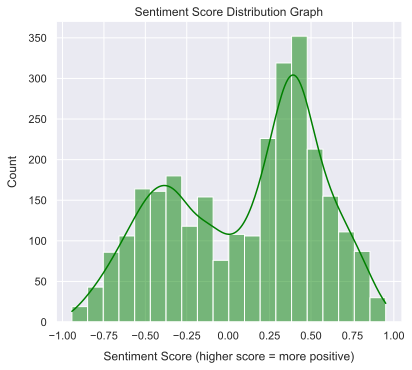

In [11]:
# droping neurtral sentiments such as questions or really short title submissions
df = df.query('sentiment_score != 0')

# plotting the ditribution of sentiment scores
g1 = sns.displot(df['sentiment_score'].astype(float), bins=20, kde=True, color='g')
g1.fig.set_size_inches(6,5)
g1.set_axis_labels("Sentiment Score (higher score = more positive)", "Count", labelpad=10)
plt.title("Sentiment Score Distribution Graph")

# show
plt.show()

The distribution is bimodal given that it peeks on both sides of 0, however it is more skewed towards the positive sentiments rather than the negative sentiments. This is a positive outcome since ESG related topics seem to resonate with users over time as seen in the trend graph before. 


___

## 6. Sentiment Analysis of the Comment Data Frame

The sentiment analysis of the comment section will follow a similar process as for the submission titles. 

In [12]:
# importing the comment data frame
df2 = pd.read_csv(COM_DF, dtype=str, encoding='utf-8')

# dropping deleted comments & duplcates
df2 = df2[df2['comment']!='[deleted]']
df2 = df2.drop_duplicates(subset=['comment'])

# cleaning strings from new lines and other characters - regular exporessions
df2['comment'] = df2['comment'].replace(r'\n',' ', regex=True)
df2['comment'] = df2['comment'].str.replace('[^\w\s]','', regex=True)

# show 
df2.head(5)

,submission_id,comment_id,comment_author,comment,keyword
0,jk3y7q,gagzu21,Thebillybool,What type of experience do you have If youre not 100 set on finance but still want a career in ESG you could also look at ESG Consulting roles at least from my experience it seems theyre more open to having diverse experience and are very receptive to people who have a genuine interest in ESG I know of one specific firm in NYC I think they hire offcycle but Im sure there are more as well Dont be discouraged,esg
1,jk3y7q,gairrx7,whatrpeople,I dont really see ESG as an entry level role Id look for other roles in asset management or research first,esg
2,jc04cz,g8ywxyr,whatrpeople,Everyone I know in legitimate ESG positions has at least a masters degree especially if theyre focuses on the E portion of ESG,esg
4,ival7l,g5qmbql,FeralAnalyst,I am an accidental ESG analyst My job is more quantitative in nature than most The work is interesting but can be frustrating ESG is often marketed as Doing Good with your but investing in Apple Microsoft and Home Depot does not really fit that definition for me You are definitely not too old for this type of role but it helps to have some specific knowledge set Experience in renewable energy sustainable farming nonprofits or CFA progress would all benefit you in finding a position,esg
5,ival7l,g5qxfrc,AlessisMon1,I work as an ESG analyst in a small team I feel the term is a bit blanketly ambiguous as we all provide very different functions that while ESG related the pertinent skills are not necessarily RI specific I think what region you work in obviously affects things like here age would be an irrelevant factor if you had good skills in other areas modelling reporting data analytics I enjoy aspects of what I do however I feel a lot of it feels menial and pointless but I guess its a transitioning industry I personally am looking to leverage the skills Ive learnt in this to move into other areas but using it as a skillset within it This again I feel would be region dependant but various qualifications have different benefits depending on what role within ESG you actually want to do noone in our team has is undertaking the same qualifications,esg


___

In [ ]:
# apply the functions on the comment section of the data frame
df2['sentiment_score'] = df2['comment'].astype(str).apply(get_sentiment_score)
df2['sentiment'] = df2['sentiment_score'].apply(get_sentiment)

Did not show top 5 positive and negative comments as some of them were very graphic, while other comments were very long. You can check them out in the original csv file. 

**Now, graphing sentiment distribution:**

In [ ]:
# droping neurtral sentiments such as questions or really short title submissions
df2 = df2.query('sentiment_score != 0')

# plotting the ditribution of sentiment scores
g1 = sns.displot(df2['sentiment_score'].astype(float), bins=20, kde=True, color='g')
g1.fig.set_size_inches(6,5)
g1.set_axis_labels("Sentiment Score (higher score = more positive)", "Count", labelpad=10)
plt.title("Sentiment Score Distribution Graph")

# show
plt.show()

It can be seen that the comment sentiment distribution follows the submission sentiment distribution as they were both bimodal. However, the comments seem to have a much stronger positive sentiment relative to the titles submission. 
___

## 7. Unique Word Count of Comments per Unique Keyword

It is interesting to look at what words were used the most in the comments for each keyword submitted. This way we can understand what concerns do the users often mention when ESG topics are posted on Reddit. 

In [ ]:
# initialize a dictionary to store the different dataframes in 
dict={}

# start a loop to get the comments based on their keywords, and then joining the comments into one large string
for keyword in df2['keyword'].unique():
    dict[keyword] = df2[df2['keyword']==keyword]['comment'].astype(str).to_list()
    dict[keyword] = ' '.join(dict[keyword]).lower()

At this point, we have a 1 row data frames for each keyword that includes the keyword and the corresponding comments in a 1 long string. This is better and faster for word counting.

In [ ]:
# initialize the NLTK tokenizer 
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# initialize the stopwords list in the english language
stopwords = nltk.corpus.stopwords.words('english')

# increasing stopwords by removing non-relevant words from the word count
other_stopwords = [
    'one', 'make', 'like', 'even', 'going','www',
    'r', 'com', 'like', 'would', 'https', 'get', 'people',
    'think', 'want', 'much', 'also','could','1', 'dont', 'im',
    'time','youre','need','really','know','well','go','way',
    'see','still','lot','esg','use','take','something','year',
    'greenwashing','things','thing','say','put'
    ]

# adding the extra words into the stopwords list
for i in other_stopwords:
    stopwords.append(i)

At this point, we have a dictionary of data frames, and a list of stopwords that we wish to use. 

Next step is to apply the tokenizer on the comment section of the data frames. 

In [ ]:
# initializing and empty data frame with the relevant columns
main_df = pd.DataFrame(columns=['word','frequency','keyword','total comments'])

# creating a loop to go over the comments in each data frame in the dictionary
for list in dict.keys():
    
    # word list
    words_list = tokenizer.tokenize(dict[list])
    word_distribution = nltk.FreqDist(w for w in words_list if w not in stopwords)
    
    # the data frame built to append
    word_df = pd.DataFrame(
        word_distribution.most_common(10),
        columns = ['word', 'frequency']
        )  
    
    # adjustments to get the correct format before graphing
    word_df['keyword'] = str(list)
    word_df['total comments'] = len(df2[df2['keyword']==str(list)].index)
    
    # concatinating the final data frame using the initiale empty data frame outside the loop
    main_df = pd.concat([main_df, word_df])

# getting the per comment basis of the word frequency
main_df['per comment'] = main_df['frequency'].astype(int) / main_df['total comments'].astype(int)
main_df['word'] = main_df['word'].str.title()
main_df['keyword'] = main_df['keyword'].str.title()
main_df['per comment'] = main_df['per comment'].round(3)

In [ ]:
# show
main_df.head(20)

Now that the final data frame is done and ready to be graphed, we create another loop to generate the graphs.


In [ ]:
# print
print("\n")

# graphing
for keyword in main_df['keyword'].unique():
    
    # graph
    g = sns.catplot(
            x='per comment',
            y='word',
            data=main_df[main_df['keyword']==keyword], 
            kind='bar', 
            aspect=1, 
            palette="YlGnBu_r")
    
    # grabbing max value
    max = data=main_df[main_df['keyword']==keyword]['per comment'].max()
    
    # graph settings
    g.fig.set_size_inches(7,3)
    g.set_axis_labels("Frequency per Comment", "Unique Word", labelpad=10)
    plt.title(f"Word Frequency - Keyword = {keyword}", fontweight="bold")
    plt.xticks(np.arange(0, max, 0.02))

    # show
    plt.show()
    print('\n')

* It can be seen that each keyword had its own set of unique word count. The word "Money" had highest frequency across all keywords which makes sense given that ESG is looked at before investing. 


* Searching for the "ESG" keyword yields politicians such as Pete Buttigieg, Bernie Sanders, and Joe Biden. The names of these politicians have the highest word count rate in the category. Pete at over 20% of total comments, while Biden and Sanders around 19% of the total comments. 


* The investing keywords seem to yield similar frequency of words with "Trump" being mentioned frequently under responsible and impact investing. 


* Greenwashing topics show interesting results with "plastic", "oil", "carbon", "energy", and "climate" being one of the most used words.
___

# Conclusion

Understanding the general sentiment regarding ESG related topics by scraping social media seems to be a valid idea. Reddit can be controversial, similar to Twitter, in terms of comments and replies. It can also be biased as many have indicated in several comments. However, Reddit is considered the "face of the internet" which is valuable of its own. 


The results of the scrape show that there is a strong upwards trend for ESG related topics. This is also shown with many stories in the news the latest being Jeff Bezos pledging $10 Billion to fight climate change. Many comments considered that this was a PR stunt to [greenwash](https://www.forbes.com/sites/prakashdolsak/2019/09/20/amazons-climate-pledge-greenwashing-or-a-game-changer/?sh=634d1b4455b6) Amazon. However, it does show that there is a corporate shift towards social and environmental responsibility. 

The sentiment graph show the first level replies for the submissions, so the first reaction to the submission basically. They seem to be positively skewed in both the comments and submissions which supports why the trend has been significantly increasing over the past 5 years.  



___
[![esg_image](https://www.jpmorgan.com/content/dam/jpm/commercial-banking/insights/leadership/esg%20-article-graphic.jpg)](https://www.jpmorgan.com/content/dam/jpm/commercial-banking/insights/leadership/esg%20-article-graphic.jpg)
___